# Convolutional networks

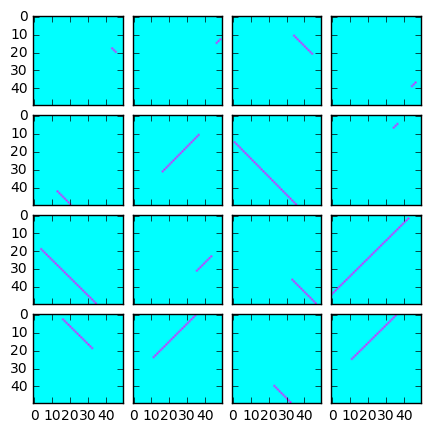

In [229]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
% matplotlib inline


def create_data(images=500):
    target=np.arange(images) %2
    dimensions=50

    x=np.zeros((images,dimensions,dimensions))
    start=np.random.randint(1,dimensions-2,size=images)

    for i in range(images):
        j=np.random.randint(dimensions-2)
        j_max = j + np.random.randint(1,dimensions-j-1)
        while start[i]>=0 and start[i]<dimensions and j<=j_max:
            x[i,start[i],j]=1
            if i%2==0:
                start[i]=start[i]+1
            else:
                start[i]=start[i]-1
            j+=1
    return x,target

train_x,train_y=create_data(5000)
test_x,test_y=create_data(500)

fig = plt.figure(1, (5., 5.))
grid = ImageGrid(fig, 111, nrows_ncols=(4, 4), axes_pad=0.1)
for i in range(16):
    grid[i].imshow(train_x[i],cmap='cool')  
plt.show()

In [232]:
train_x_flat=train_x.reshape(train_x.shape[0],-1)
test_x_flat=test_x.reshape(test_x.shape[0],-1)

train_x_flat.shape

(5000L, 2500L)

# MLP approach

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_35 (InputLayer)            (None, 2500)          0                                            
____________________________________________________________________________________________________
dense_63 (Dense)                 (None, 10)            25010       input_35[0][0]                   
____________________________________________________________________________________________________
dense_64 (Dense)                 (None, 5)             55          dense_63[0][0]                   
____________________________________________________________________________________________________
dense_65 (Dense)                 (None, 1)             6           dense_64[0][0]                   
Total params: 25071
_______________________________________________________________________

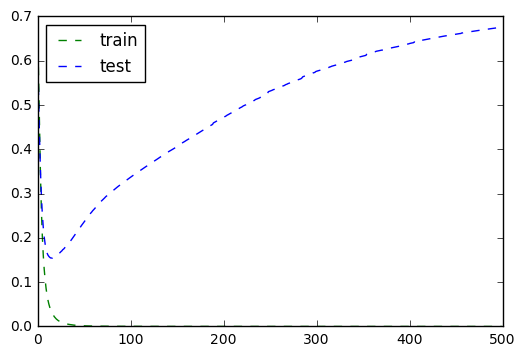

In [233]:
from keras.layers import Input, Reshape, Dense
from keras.models import Model

input1 = Input(shape=(2500,))
x = Dense(10,activation='relu')(input1)
x = Dense(5,activation='relu')(x)
prediction = Dense(1,activation='sigmoid')(x)

model_1 = Model(input=input1, output=prediction)
model_1.compile(loss='binary_crossentropy', optimizer ='adam', metrics=['acc'])
model_1.summary()

model_1.fit(train_x_flat,train_y,batch_size=100, nb_epoch=500, verbose=0,validation_data=(test_x_flat, test_y))

plt.plot(model_1.history.epoch, model_1.history.history['loss'], 'g--',
         model_1.history.epoch, model_1.history.history['val_loss'], 'b--',)
plt.legend(['train', 'test'], loc='upper left')
print ("loss:",model_1.history.history['loss'][-1],"accuray:",model_1.history.history['acc'][-1])
print ("test loss:",model_1.history.history['val_loss'][-1],"test accuray:",model_1.history.history['val_acc'][-1])


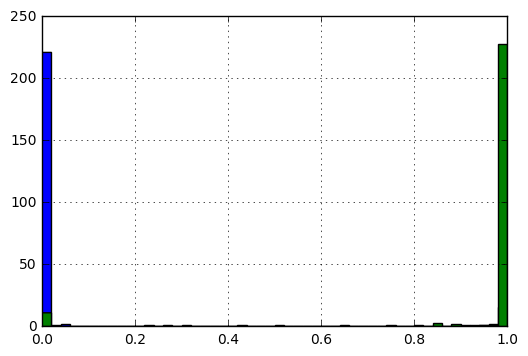

In [234]:
import pandas as pd

result=pd.DataFrame()
result['y']=test_y
result['pred']=model_1.predict(test_x_flat)
result.head()

result.ix[(result['y']==0),'pred'].hist(bins=50)
result.ix[(result['y']==1),'pred'].hist(bins=50)

22


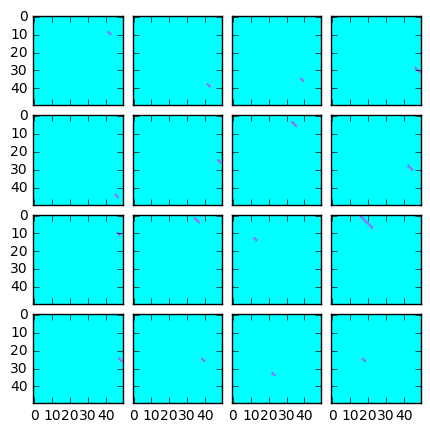

In [235]:
#checks=result[(result['y']==1) & (result['pred']>0.45) &  (result['pred']<0.55)]
checks=result[(result['y']==0) & (result['pred']>0.8)]
#checks=result[(result['y']==1) & (result['pred']<0.1)]

checks=checks.reset_index()
print (len(checks))

fig = plt.figure(1, (5., 5.))
grid = ImageGrid(fig, 111, nrows_ncols=(4, 4), axes_pad=0.1)
for i in range(16):
    grid[i].imshow(test_x[checks.ix[i,'index']],cmap='cool')  
plt.show()

# Convolution

In [236]:
train_x_conv=train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
test_x_conv=test_x.reshape(test_x.shape[0],test_x.shape[1],test_x.shape[2],1)

In [124]:
from keras import backend as K
keras.backend.backend()
keras.backend.image_data_format()

AttributeError: 'module' object has no attribute 'image_data_format'

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_36 (InputLayer)            (None, 50, 50, 1)     0                                            
____________________________________________________________________________________________________
conv (Convolution2D)             (None, 50, 50, 1)     10          input_36[0][0]                   
____________________________________________________________________________________________________
maxpooling2d_6 (MaxPooling2D)    (None, 1, 1, 1)       0           conv[0][0]                       
____________________________________________________________________________________________________
flatten_14 (Flatten)             (None, 1)             0           maxpooling2d_6[0][0]             
___________________________________________________________________________________________

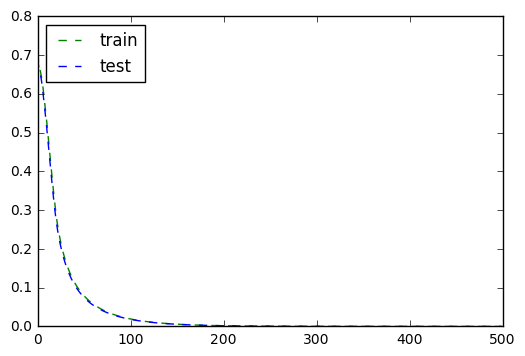

In [237]:
from keras.layers import Input, Reshape, Dense, Conv2D, Flatten,MaxPooling2D
from keras.models import Model

input1 = Input(shape=(50,50,1))
x = Conv2D(1,3,3,activation='relu',border_mode='same', name="conv")(input1)
x = MaxPooling2D((50,50))(x)  
x = Flatten()(x)
prediction = Dense(1,activation='sigmoid')(x)

model_2 = Model(input=input1, output=prediction)
model_2.compile(loss='binary_crossentropy', optimizer ='adam', metrics=['acc'])
model_2.summary()

model_2.fit(train_x_conv,train_y,batch_size=100, nb_epoch=500, verbose=0,validation_data=(test_x_conv, test_y))

plt.plot(model_2.history.epoch, model_2.history.history['loss'], 'g--',
         model_2.history.epoch, model_2.history.history['val_loss'], 'b--',)
plt.legend(['train', 'test'], loc='upper left')
print ("loss:",model_2.history.history['loss'][-1],"accuray:",model_2.history.history['acc'][-1])
print ("test loss:",model_2.history.history['val_loss'][-1],"test accuray:",model_2.history.history['val_acc'][-1])

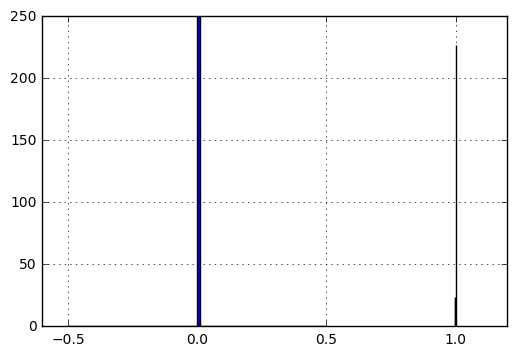

In [242]:
import pandas as pd

result=pd.DataFrame()
result['y']=test_y
result['pred']=model_2.predict(test_x_conv)
result.head()

result.ix[(result['y']==0),'pred'].hist(bins=100)
result.ix[(result['y']==1),'pred'].hist(bins=100)

250


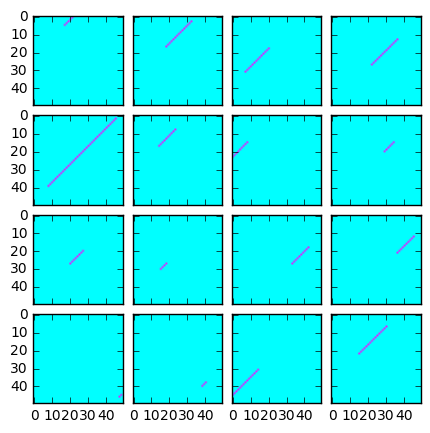

In [281]:
#checks=result[(result['y']==1) & (result['pred']>0.45) &  (result['pred']<0.55)]
checks=result[(result['y']==1) & (result['pred']>0.5)]
#checks=result[(result['y']==1) & (result['pred']<0.1)]

checks=checks.reset_index()
print (len(checks))

fig = plt.figure(1, (5., 5.))
grid = ImageGrid(fig, 111, nrows_ncols=(4, 4), axes_pad=0.1)
for i in range(16):
    grid[i].imshow(test_x[checks.ix[i,'index']],cmap='cool')  
plt.show()

In [256]:
w=model_2.get_layer("conv").weights[0].get_value()
w=w.reshape(3,3)
w

array([[-1.55784512,  0.2810021 ,  1.67594731],
       [ 0.24305138,  3.74551773, -0.35604882],
       [ 2.19115853,  0.71713907, -1.5569005 ]], dtype=float32)

In [278]:
p1=np.array([[1,0,0],[0,1,0],[0,0,1]])
p2=np.array([[0,0,1],[0,1,0],[1,0,0]])

res1=np.multiply(w,p1)
res2=np.multiply(w,p2)
print res1
print "res 1 sum:",np.sum(res1)
print 
print res2
print "res 2 sum:",np.sum(res2)

[[-1.55784512  0.          0.        ]
 [ 0.          3.74551773 -0.        ]
 [ 0.          0.         -1.5569005 ]]
res 1 sum: 0.6307721138

[[-0.          0.          1.67594731]
 [ 0.          3.74551773 -0.        ]
 [ 2.19115853  0.         -0.        ]]
res 2 sum: 7.61262357235
